In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
usdf = pd.read_csv('clean_this_shit.csv', index_col = 0)
X_train = usdf.joined_all.values

In [7]:
usdf

,patnum,grant_date,title,abstract,citation,cpc,inventor,assignee,claims,examiners,cpc_01,cpc_02,cpc_03,cites_01,joined_cleaned,joined_all
0,9043460,"May 26, 2015",Distributed management with embedded agents in...,Distributed mobile device management including...,20030084010 | 20050256876 | 20070237133 |,H04L41/046 | H04L67/04 | H04L67/142 | H04L67/1...,"Kim | Mansu(Cupertino, CA), Batchu | Suresh Ku...","MOBILE IRON, INC.","What is claimed is:1. A method, comprising: r...",Shin | Kyung H,H_uspto H_uspto H_uspto H_uspto H_uspto H_uspt...,H04L41/046_uspto H04L67/04_uspto H04L67/142_us...,H04L4_uspto H04L6_uspto H04L6_uspto H04L6_uspt...,20030084010_c_val 20050256876_c_val 2007023713...,distribute management embed agent enterprise a...,distribute management embed agent enterprise a...
1,9043350,"May 26, 2015",Providing topic based search guidance,"Methods, systems, and computer-readable media ...",7502786 | 7523099 | 7657519 | 7836044 | 791752...,G06F16/9535 | G06F16/951 | G06F16/9038 | G06F1...,"Tomko | Daniel Jason(Bellevue, WA), Rajvanshy ...","Microsoft Technology Licensing, LLC",The invention claimed is:1. One or more compu...,Le | Hung,G_uspto G_uspto G_uspto G_uspto G_uspto,G06F16/9535_uspto G06F16/951_uspto G06F16/9038...,G06F1_uspto G06F1_uspto G06F1_uspto G06F1_uspt...,7502786_c_val 7523099_c_val 7657519_c_val 7836...,provide topic base search guidance method syst...,provide topic base search guidance method syst...
2,9043337,"May 26, 2015",Data mining and model generation using an in-d...,Embodiments are described for a system and met...,20040215599 | 20040249779 | 20050102292 | 2008...,G06F16/258,"Chen | Yi-Ling(Austin, TX), Wong | Anderson(Su...",,What is claimed is:1. A method of generating ...,Bullock | Joshua,G_uspto,G06F16/258_uspto,G06F1_uspto,20040215599_c_val 20040249779_c_val 2005010229...,data mine model generation use database analyt...,data mine model generation use database analyt...
3,9043273,"May 26, 2015",Method and apparatus for declarative data ware...,A data warehouse is constructed using the rela...,6167405 | 6208990 | 6587856 | 6745196 | 677567...,G06F16/283 | G06F16/289 | G06F16/951 | G06F16/...,"Rich | Lawrence Scott(Cary, NC), Jaouani | Raf...",INTERNATIONAL BUSINESS MACHINES CORPORATION,What is claimed is:1. A method to create a da...,"Bullock, Jr. | Lewis A",G_uspto G_uspto G_uspto G_uspto G_uspto G_uspt...,G06F16/283_uspto G06F16/289_uspto G06F16/951_u...,G06F1_uspto G06F1_uspto G06F1_uspto G06F1_uspt...,6167405_c_val 6208990_c_val 6587856_c_val 6745...,method apparatus declarative data warehouse de...,method apparatus declarative data warehouse de...
4,9043265,"May 26, 2015",Methods and systems for constructing intellige...,A computer implemented method of constructing ...,4967368 | 6120297 | 6708311 | 7136876 | 725477...,G06F17/2785 | G06F17/2735 | G06N5/02,"Michelin | Philippe(Paris,FR)","AEBIS, INC.",I claim:1. A computer implemented method of c...,Chen | Alan,G_uspto G_uspto G_uspto,G06F17/2785_uspto G06F17/2735_uspto G06N5/02_u...,G06F1_uspto G06F1_uspto G06N5_uspto,4967368_c_val 6120297_c_val 6708311_c_val 7136...,method system construct intelligent glossary d...,method system construct intelligent glossary d...
5,9043264,"May 26, 2015",Scanning data streams in real-time against lar...,Embodiments of the disclosure include a method...,5414704 | 5598410 | 6128296 | 6167047 | 645338...,H04L45/00 | G06F9/4498 | G06N5/047,"Van Lunteren | Jan(Gattikon,CH)",International Business Machines Corporation,The invention claimed is:1. A method for part...,Gaffin | Jeffrey A,H_uspto G_uspto G_uspto,H04L45/00_uspto G06F9/4498_uspto G06N5/047_uspto,H04L4_uspto G06F9_uspto G06N5_uspto,5414704_c_val 5598410_c_val 6128296_c_val 6167...,scan data stream real time large pattern colle...,scan data stream real time large pattern colle...
6,9043263,"May 26, 2015",Systems and methods for control reliability op...,"In one embodiment, a system includes a data co...",4051669 | 4642782 | 4649515 | 5508897 | 56340

In [ ]:
#colnames=['Sequence-Length', 'UCSC-style-name'] 
#It will convert tab delimiter text file into dataframe
dataframe1 = pd.read_csv("uspto.patent.examiner.txt",delimiter="\t", header=None)
#Write dataframe into CSV
dataframe1.to_csv("upe.csv", encoding='utf-8', index=False)
upe=dataframe1
u = upe.to_dict()

In [ ]:
patent_number = list(df['patnum'])
temp_str = []
for i in range(len(patent_number)):
    temp_str.append(patent_number[i][2:len(patent_number[i])-2])

examiner_name=[]
for j in temp_str:
        try:
            ind = list(u[0].values()).index(j)
        except:
            ind = -1
        if ind >= 0:
            examiner_name.append(u[1][ind])
        else:
            examiner_name.append('NA')
            
df['Examiner'] = examiner_name

In [8]:
X_train[1]

'provide topic base search guidance method system computer readable medium provide topical search suggestion provide topical search suggestion allow user receive search result relate designate topic subject matter present invention may generate multiple topic base search provide user search may search prefix include one word enter search query box complete search query submit search engine search interface present topic derive search prefix user user submit query another embodiment user designate multiple search present invention generate search result base search present topic extract search result one embodiment topic extract perform natural language analysis search result metadata invention one computer storage hardware device computer executable instruction embody thereon execute compute device perform method generate topical query suggestion response multiple search method comprise receive multiple search user part search session search generate set search result thereby form plur

# Step 1: max and min Tfidf terms

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization.

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones.


Consider a document containing 100 words wherein the word light appears 10 times. The term frequency (i.e., tf) for light is then (10 / 100) = 0.1. Now, assume we have 10 million documents and the word light appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.1 * 4 = 0.4.

In [9]:
def max_min_tfidf(X_train, n = 20):
    
    """
        X_train: a list of text documents
        n: number of tokens to show 

        return: mins, maxs Series of n tokens with lowest tfidf and highest tfidf values respectively
    """
    
    vect = TfidfVectorizer(token_pattern=r'\b[\w|/]+\b').fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    feature_names = np.array(vect.get_feature_names())
    sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
    smallest = feature_names[sorted_tfidf_index[:n]]
    largest = feature_names[sorted_tfidf_index[:-1 - n:-1]]
    mins = pd.Series(data = sorted(X_train_vectorized.max(0).toarray()[0])[:n], index = smallest).sort_index() 
    maxs = pd.Series(data = sorted(X_train_vectorized.max(0).toarray()[0])[:-1 - n:-1], index = largest).sort_index()
    return mins, maxs

Lets see what min and max tfidf values are when not touching the weights of the cleaned data corpus

In [10]:
mins, maxs = max_min_tfidf(X_train)

In [11]:
print('mins', mins)
print('maxs', maxs)

mins 5247627_c_val         0.001181
5434972_c_val         0.001181
actionsin             0.001279
contextfig            0.001279
controla              0.001279
controlchemical       0.001279
controllersanother    0.001279
esterification        0.001279
esterify              0.001279
ext                   0.001279
intech                0.001279
interfacethe          0.001279
june                  0.001279
neede                 0.001279
nit                   0.001279
prioritiesin          0.001181
routinein             0.001279
routinethe            0.001279
subr                  0.001279
subrout               0.001279
dtype: float64
maxs accommodation    0.938350
adapter          0.950742
affective        0.942815
certificate      0.944706
codon            0.938057
conduit          0.931552
cr               0.967767
diagnostic       0.946728
doc              0.944410
filesystem       0.944358
friar            0.929887
fsa              0.960127
msc              0.946290
pagination       

# Step 2 

Create an instance of the CountVectorizer class. Call the fit() function in order to learn a vocabulary from one or more documents. Call the transform() function on one or more documents as needed to encode each as a vector.
Because these vectors will contain a lot of zeros, we call them sparse.

We use a learned CountVectorizer with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents, which is the same as the TfidfVectorizer used above. The reason for such an alternative approach is for the modification of the CPC weights that can help with better and more accurate clustering of patents.

We normalize to reduce the contributions of the terms that are common or rare.

In [12]:
def tfidf_cpc_weights(X_train, n=1.2):
    
    """
        X_train: a list of text documents
        n: magnitude of change to the weight of selected X_train elements

        return: tfidf, tfidf_matrix, count_vectorizer
    """
    
    count_vectorizer = CountVectorizer(token_pattern=r'\b[\w|/]+\b').fit(X_train)
    X_train_vectorized = count_vectorizer.transform(X_train)
    tfidf = TfidfTransformer(norm="l2")
    tfidf.fit(X_train_vectorized)
    tf_idf_matrix = tfidf.transform(X_train_vectorized)
    
    position = count_vectorizer.vocabulary_['a_uspto']
    tf_idf_matrix[:, position] *= n
    #print('adil is now', tf_idf_matrix[:, position].max(0))
    position = count_vectorizer.vocabulary_['b_uspto']
    tf_idf_matrix[:, position] *= n
    #print('bdil is now', tf_idf_matrix[:, position].max(0))
    position = count_vectorizer.vocabulary_['c_uspto']
    tf_idf_matrix[:, position] *= n
    #print('cdil is now', tf_idf_matrix[:, position].max(0))
    position = count_vectorizer.vocabulary_['f_uspto']
    tf_idf_matrix[:, position] *= n
    #print('fdil is now', tf_idf_matrix[:, position].max(0))
    position = count_vectorizer.vocabulary_['g_uspto']
    tf_idf_matrix[:, position] *= n
    #print('gdil is now', tf_idf_matrix[:, position].max(0))
    position = count_vectorizer.vocabulary_['h_uspto']
    tf_idf_matrix[:, position] *= n
    #print('hdil is now', tf_idf_matrix[:, position].max(0))
    position = count_vectorizer.vocabulary_['y_uspto']
    tf_idf_matrix[:, position] *= n
    #print('ydil is now', tf_idf_matrix[:, position].max(0))
    return tfidf, tf_idf_matrix, count_vectorizer

In [13]:
tfidf, tf_idf_matrix, count_vectorizer = tfidf_cpc_weights(X_train)

In [14]:
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [15]:
print(tf_idf_matrix)

  (0, 125881)	0.00927818913675
  (0, 125791)	0.0257717836699
  (0, 124804)	0.00663998284826
  (0, 124796)	0.0196633158561
  (0, 124411)	0.00420215905892
  (0, 124330)	0.00633500410201
  (0, 124294)	0.00627937384142
  (0, 123801)	0.0109778676537
  (0, 123690)	0.00295163628021
  (0, 122809)	0.0989940891843
  (0, 122720)	0.00814050170308
  (0, 122659)	0.0658469852374
  (0, 122631)	0.0178647519106
  (0, 121790)	0.0185785621712
  (0, 121649)	0.011299524669
  (0, 121437)	0.0995054064759
  (0, 121431)	0.0801860504607
  (0, 121423)	0.00942534350731
  (0, 120635)	0.0599058954447
  (0, 120541)	0.00512864515222
  (0, 120172)	0.136966523795
  (0, 119753)	0.00376432086832
  (0, 119654)	0.00454359640149
  (0, 119080)	0.0446689652881
  (0, 118928)	0.00915061717201
  :	:
  (12968, 101015)	0.0398291138561
  (12968, 100987)	0.0174345516947
  (12968, 100979)	0.00346994941964
  (12968, 100839)	0.00345569915521
  (12968, 100002)	0.0115658126677
  (12968, 99928)	0.0115658126677
  (12968, 99661)	0.0070667475

In [16]:
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\b[\\w|/]+\\b', tokenizer=None,
        vocabulary=None)

# Step 3

In [17]:
def pca_xyz(tf_idf_matrix):
    
    """
        tf_idf_matrix: a matrix of tfidf values for each word

        return: x_list, y_list, z_list lists of 3D coordinates
    """
    
    pca = PCA(n_components=3,svd_solver='randomized',whiten=True)
    pca.fit(tf_idf_matrix.toarray())
    tfidf_proj = pca.transform(tf_idf_matrix.toarray())
    x_list=[]
    y_list=[]
    z_list=[]
    for i in range(len(tfidf_proj)):
        x_list.append(tfidf_proj[i][0])
        y_list.append(tfidf_proj[i][1])
        z_list.append(tfidf_proj[i][2])
    return x_list, y_list, z_list

In [18]:
x_list, y_list, z_list = pca_xyz(tf_idf_matrix)
usdf['x_coor'] = x_list
usdf['y_coor'] = y_list
usdf['z_coor'] = z_list

In [19]:
latest_csv = usdf

In [21]:
latest_csv.to_csv('newest_data.csv')

In [22]:
#index	patnum	grant_date	title	abstract	citation	cpc	inventor	assignee	claims	examiners	joined_cleaned
lcsv=latest_csv.drop(columns=['citation','abstract','cpc','inventor','assignee','claims','joined_cleaned'])

In [26]:
lcsv=lcsv.drop(columns=['cpc_01','cpc_02','cpc_03','cites_01','joined_all'])
#lcsv.to_csv('test_newdata.csv')

In [27]:
lcsv.to_csv('data_tob.csv')

,patnum,grant_date,title,examiners,x_coor,y_coor,z_coor
0,9043460,"May 26, 2015",Distributed management with embedded agents in...,Shin | Kyung H,-0.683942,0.131069,-1.299561
1,9043350,"May 26, 2015",Providing topic based search guidance,Le | Hung,-1.000444,-0.654602,-1.404266
2,9043337,"May 26, 2015",Data mining and model generation using an in-d...,Bullock | Joshua,-0.724337,-0.417895,1.642753
3,9043273,"May 26, 2015",Method and apparatus for declarative data ware...,"Bullock, Jr. | Lewis A",-0.783216,-0.229391,0.331835
4,9043265,"May 26, 2015",Methods and systems for constructing intellige...,Chen | Alan,-0.397793,-0.343200,-0.292836
5,9043264,"May 26, 2015",Scanning data streams in real-time against lar...,Gaffin | Jeffrey A,-1.013096,3.405665,1.311574
6,9043263,"May 26, 2015",Systems and methods for control reliability op...,Chang | Li-Wu,-0.410621,0.915927,-0.102809
7,9043262,"May 26, 2015","Information providing apparatus for vehicle, a...",Gaffin | Jeffrey A,-0.077822,-0.144641,-1.054564
8,9043261,"May 26, 2015","Latent variable model estimation apparatus, an...",Gaffin | Jeffrey A,0.125225,-0.526092,0.675576
9,9043260,"May 26, 2015",Method and apparatus for contextual content su...,Gaffin | Jeffrey A,-0.739949,-0.169182,-0.801021


# Step 4

In [ ]:
def k_means(tf_idf_matrix, n_clusters = 5):
        
    """
        tf_idf_matrix: a matrix of tfidf values for each word

        return: instance of kmeans, clusters
    """
    
    kmeans = KMeans(n_clusters, max_iter= 1000, random_state=8).fit(tf_idf_matrix)
    clusters = kmeans.labels_.tolist()
    return kmeans, clusters

In [168]:
kmeans, clusters = k_means(tf_idf_matrix)
df['cluster'] = clusters

In this case, we want top 30 terms of each cluster to be printed

In [ ]:
def top_terms(kmeans, count_vectorizer, n_terms = 30, n_clusters = 5):
    
    """
        kmeans: for use of getting centers
        count_vectorizer: prefit for use of getting features
        n_terms: number of top terms requested
        n_clusters: number of clusters

        return: a list of lists of terms per cluster
    """
    #get the centroids by doing kmeans.cluster_centers_, which should have dimensionality 5 (number of clusters) x n (number of features)
    #then sort the indices of features by by the ones closest to each centroid
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = count_vectorizer.get_feature_names()
    lists = []
    temp = []
    #print(order_centroids.shape)
    for i in range(n_clusters):
        print("Cluster %d words:" % i, end='')

        for ind in order_centroids[i, :n_terms]:
            print(' %s' % terms[ind], end=',')
            if not terms[ind].endswith('dil') and not terms[ind].endswith('nova'):
       
                temp.append(terms[ind])
        
        lists.append(temp)
        temp = []
        print('\n')
    
    from collections import Counter
    mylist = []
    for i in range(n_clusters):
        mylist = mylist + lists[i]
    #print('LIST', mylist)
    cnt = Counter(mylist)
    across_all = [k for k, v in cnt.items() if v > 1]
    #print('across_all', across_all)
    #final = [[x for x in range(n_terms)] for y in range(n_clusters)]
    final = []
    temp = []
    #print('LISTSS', lists)
    for i in range(n_clusters):
        final.append([t for t in lists[i] if t not in across_all])
    return final

In [ ]:
n_clusters = 5
n_terms = 30
terms_list = top_terms(kmeans, count_vectorizer, n_terms, n_clusters)

Appent the list of terms for each cluster in the dataframe.

In [ ]:
df['terms'] = 'xyz'
for i in range(n_clusters):
    df.terms[df.cluster == i] = ', '.join(terms_list[i])

In [ ]:
df.drop(['cpc_01', 'cpc_02', 'cpc_03', 'cites_01', 'joined_cleaned', 'joined_all'], axis = 1, inplace = True)
             
df.to_csv('final_01.csv')

In [ ]:
df_today = df

In [ ]:
centroid_clusters = df.groupby(['cluster']).mean().reset_index()

In [ ]:
centroid_clusters

In [ ]:
f = df[df['patnum'].str.contains("US8487")]
seed_patent_cluster = f['cluster']

In [ ]:
seed_patent_cluster

In [ ]:
clustered_patents = df.where(df.cluster.isin(seed_patent_cluster))

In [ ]:
clust_p = clustered_patents

# Step 5: Finding the patents closest to each cluster

In [ ]:
def distance_to_cluster(df, n_clusters = 5):
    
    """
        df: a dataframe consisted of patent data
        n_clusters: number of clusters given

        return: a modified dataframe with distance to each clusters values appended as additional columns
    """
    
    for i in range(n_clusters):
        mean_0 = np.array([df.x_coor[df.cluster == 3].mean(), df.y_coor[df.cluster == 3].mean(), df.z_coor[df.cluster == 3].mean()])
        distance_0 = df[df.cluster==3].apply(
            lambda x: np.sqrt((df[df.cluster==3].x_coor-mean_0[0])**2 + (df[df.cluster==3].y_coor-mean_0[1])**2 + (df[df.cluster==3].z_coor-mean_0[2])**2)
        )
        df['distance' + str(i)] = 0
        df['distance' + str(i)] = distance_0
    return df

def closest_patents(df, n_clusters = 5):
    
    """
        df: a dataframe consisted of patent data
        n_clusters: number of clusters given
        return: a dataframe consisted of patents closest to each cluster
    """
    
    df.reset_index(inplace = True)
    df2 = pd.DataFrame(index = np.arange(n_clusters), columns = df.columns.values)
    for i in range(n_clusters):
        df2.iloc[i] = df.loc[df['distance' + str(i)].idxmin()]
    return df2

In [ ]:
df2 = distance_to_cluster(df)
closest_patents = closest_patents(df2)

In [ ]:
closest_patents

In [ ]:
closest_patents.drop(['distance0', 'distance1', 'distance2', 'distance3', 'distance4'], axis = 1, inplace = True)

In [ ]:
cp=closest_patents

In [ ]:
plt.scatter(df['x_coor'],df['y_coor'])
plt.scatter(f['x_coor'],f['y_coor'])
plt.scatter(cp['x_coor'],cp['y_coor'])

In [ ]:
"""import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline"""

In [ ]:
"""threedee = plt.figure(figsize=(20,20)).gca(projection='3d')
threedee.scatter(df['x_coor'],df['y_coor'],df['z_coor'],color='yellow')
threedee.scatter(f['x_coor'],f['y_coor'],f['z_coor'],color='red')
threedee.scatter(cp['x_coor'],cp['y_coor'],cp['z_coor'],color='blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
threedee.view_init(20, 40)
plt.show()"""

In [ ]:
upe[upe[0].str.contains("8487838")]

In [ ]:
cp=closest_patents

In [ ]:
x_seed = f['x_coor']
y_seed = f['y_coor']
z_seed = f['z_coor']

In [ ]:
x_cp = list(cp['x_coor'])
y_cp = list(cp['y_coor'])
z_cp = list(cp['z_coor'])

In [ ]:
dist_seed_x=[]
for i in range(len(x_cp)):
    dist_seed_x.append(((x_seed - x_cp[i])**2 + (y_seed - y_cp[i])**2 + (z_seed - z_cp[i]**2))**(0.5))

In [ ]:
dist_seed_x

In [ ]:
clust_p

In [ ]:
x_cluster = list(clust_p['x_coor'])
y_cluster = list(clust_p['y_coor'])
z_cluster = list(clust_p['z_coor'])

In [ ]:
dist_seed_cluster=[]
for i in range(len(x_cluster)):
    dist_seed_cluster.append(float(((x_seed - x_cluster[i])**2 + (y_seed - y_cluster[i])**2 + (z_seed - z_cluster[i])**2)**(0.5)))
                             
                             
                             
                             
                             

In [ ]:
dist_seed_cluster

In [ ]:
clust_p['Distance_seed'] = dist_seed_cluster

In [ ]:
clust_p

In [ ]:
sorted_same_cluster = clust_p.sort_values(by = ['Distance_seed'])

In [ ]:
sorted_same_cluster

In [ ]:
x_all = list(df['x_coor'])
y_all = list(df['y_coor'])
z_all = list(df['z_coor'])

In [ ]:
dist_seed_all=[]
for i in range(len(x_all)):
    dist_seed_all.append(float(((x_seed - x_all[i])**2 + (y_seed - y_all[i])**2 + (z_seed - z_all[i])**2)**(0.5)))
                             
                             
                             
                             
                             

In [ ]:
dist_seed_all

In [ ]:
df['dist_seed'] = dist_seed_all

In [ ]:
new_all = df

In [ ]:
new_all_sort = new_all.sort_values(by=['dist_seed'])

In [ ]:
wrt_all_sort = new_all_sort[0:6]

In [ ]:
wrt_same_sort = sorted_same_cluster[0:6]

In [ ]:
wrt_all_sort

In [ ]:
wrt_same_sort

In [160]:
import pandas as pd
import numpy as np



sns.regplot(data=df, x="x_coor", y="y_coor", fit_reg=False, marker="+", color="skyblue")
#sns.regplot(data=f, x="x_coor", y="y_coor", fit_reg=False, marker="x", color="red")
sns.regplot(data=wrt_all_sort, x="x_coor", y="y_coor", fit_reg=False, marker="*", color="blue")
#sns.plt.show()
# basic plot
p1=sns.regplot(data=f, x="x_coor", y="y_coor", fit_reg=False, marker="x", color="red", scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,cp.shape[0]):
     print(cp['Examiner'][line])
     p1.text(cp['x_coor'][line]+0.2, cp['y_coor'][line], cp['Examiner'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
 
# see it
#sns.plt.show()

Chawan; Sheela


TypeError: text() missing 1 required positional argument: 's'

In [ ]:
wss = wrt_same_sort

In [ ]:
wss_new = wss.append(wrt_all_sort,ignore_index=True)

In [ ]:
wss_new = wss_new.drop('Distance_seed',axis=1)

In [ ]:
wss_new


In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

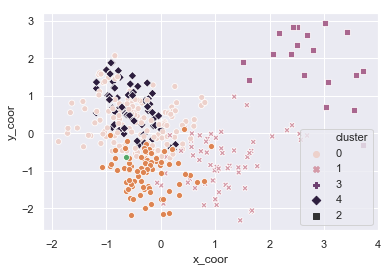

In [226]:

sns.scatterplot(x="x_coor", y="y_coor", hue="cluster",style="cluster",data=df_today)
sns.scatterplot(x="x_coor", y="y_coor",data=clust_p)
sns.scatterplot(x="x_coor", y="y_coor",data=f)

In [227]:
df

,patnum,grant_date,title,abstract,citation,cpc,inventor,assignee,claims,rank,cpc_01,cpc_02,cpc_03,cites_01,joined_cleaned,joined_all,cluster
0,US10002293B2,2018-06-19,Image collection with increased accuracy,"Image collection is provided, e.g., a system i...",US10002293B2 | US20160148049A1 | US20160148049...,G06K9/00 | G06K9/00597 | G06K9/00604 | G06F3/0...,Kuifei Yu | Lin Du | HongJiang Zhang,Beijing Zhigu Ruituo Technology Services Co Ltd,Claims (29) The invention claimed is: 1. An im...,1,G_uspto G_uspto G_uspto G_uspto G_uspto G_uspt...,G06K9/00_uspto G06K9/00597_uspto G06K9/00604_u...,G06K9_uspto G06K9_uspto G06K9_uspto G06F3_uspt...,US10002293B2_c_val US20160148049A1_c_val US201...,image collection increase accuracy image colle...,image collection increase accuracy image colle...,3
1,US10003726B2,2018-06-19,Illumination module for near eye-to-eye displa...,An illumination module can comprise a circuit ...,US10003726B2 | US20170280031A1 | US20170280031...,H04N5/00 | H04N5/222 | H04N5/225 | H04N5/2256 ...,Raymond Kirk Price | Ravi Kiran Nalla,Microsoft Technology Licensing LLC,Claims (14) What is claimed is: 1. A near-to-e...,2,H_uspto H_uspto H_uspto H_uspto F_uspto F_uspt...,H04N5/00_uspto H04N5/222_uspto H04N5/225_uspto...,H04N5_uspto H04N5_uspto H04N5_uspto H04N5_uspt...,US10003726B2_c_val US20170280031A1_c_val US201...,illumination module near eye eye system illumi...,illumination module near eye eye system illumi...,1
2,US10007329B1,2018-06-26,Drift cancelation for portable object detectio...,The technology disclosed can provide capabilit...,US10007329B1 | US10007329B1 | US20180031849A1 ...,G06F3/00 | G06F3/01 | G06F3/00 | G06F3/01 | G0...,David S. HOLZ,Leap Motion Inc,Claims (23) What is claimed is: 1. A method of...,3,G_uspto G_uspto G_uspto G_uspto G_uspto G_uspt...,G06F3/00_uspto G06F3/01_uspto G06F3/00_uspto G...,G06F3_uspto G06F3_uspto G06F3_uspto G06F3_uspt...,US10007329B1_c_val US10007329B1_c_val US201800...,drift cancelation portable object detection tr...,drift cancelation portable object detection tr...,4
3,US10007331B2,2018-06-26,Wearable intelligent systems and interaction m...,A wearable intelligent system is provided. The...,US10007331B2 | US20150185828A1 | US20150185828...,G06F3/00 | G06F3/01 | G06F3/011 | G02B27/00 | ...,Qiang Wu,Semiconductor Manufacturing International (Sha...,Claims (20) What is claimed is: 1. A wearable ...,4,G_uspto G_uspto G_uspto G_uspto G_uspto G_uspt...,G06F3/00_uspto G06F3/01_uspto G06F3/011_uspto ...,G06F3_uspto G06F3_uspto G06F3_uspto G02B2_uspt...,US10007331B2_c_val US20150185828A1_c_val US201...,wearable intelligent system interaction method...,wearable intelligent system interaction method...,0
4,US10007350B1,2018-06-26,Integrated gestural interaction and multi-user...,A technology for tracking motion of a wearable...,US10007350B1 | US10007350B1 | DE10219556A1 | U...,G06F3/00 | G06F3/01 | G06F3/017 | G02B27/00 | ...,David S. HOLZ | Matias Perez | Davide Onofrio,Leap Motion Inc,Claims (21) What is claimed is: 1. A method of...,5,G_uspto G_uspto G_uspto G_uspto G_uspto G_uspt...,G06F3/00_uspto G06F3/01_uspto G06F3/017_uspto ...,G06F3_uspto G06F3_uspto G06F3_uspto G02B2_uspt...,US10007350B1_c_val US10007350B1_c_val DE102195...,integrate gestural interaction multi user coll...,integrate gestural interaction multi user coll...,0
5,US10007365B2,2018-06-26,"Electronic apparatus, display device and displ...","An electronic apparatus, a display device, and...",US10007365B2 | US20160171660A1 | US20160171660...,G06F3/00 | G06F3/01 | G06F3/03 | G06F3/041 | G...,Bingchuan Sun | Bin Li,LENOVE (BEIJING) CO Ltd,Claims (15) The invention claimed is: 1. An el...,6,G_uspto G_uspto G_uspto G_uspto G_uspto G_uspt...,G06F3/00_uspto G06F3/01_uspto G06F3/03_uspto G...,G06F3_uspto G06F3_uspto G06F3_uspto G06F3_uspt...,US10007365B2_c_val US20160171660A1_c_val US201...,electronic apparatus device control method rot...,electronic apparatus device control method rot...,1
6,US10019831B2,2018-07-10,

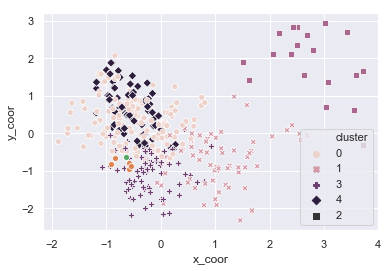

In [228]:

sns.scatterplot(x="x_coor", y="y_coor", hue="cluster",style="cluster",data=df_today)
sns.scatterplot(x="x_coor", y="y_coor",data=wrt_same_sort)
sns.scatterplot(x="x_coor", y="y_coor",data=f)


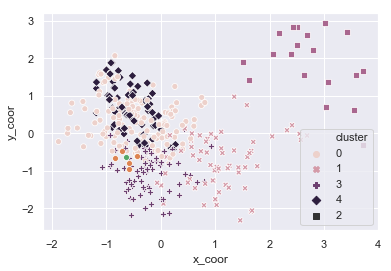

In [229]:
sns.scatterplot(x="x_coor", y="y_coor", hue="cluster",style="cluster",data=df_today)
sns.scatterplot(x="x_coor", y="y_coor",data=wrt_all_sort)
sns.scatterplot(x="x_coor", y="y_coor",data=f)

In [ ]:
f

In [ ]:
today = df.sort_values(by=['grant_date'])

In [ ]:
rank_sort = [i for i in range(1,384)]

In [ ]:
today['rank_date']=rank_sort

In [ ]:
today = today.drop('rank_date',axis=1)

In [ ]:
today

In [169]:
sns.scatterplot(x="x_coor", y="y_coor", hue="assignee",data=df_today)

/Applications/Ana/anaconda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Applications/Ana/anaconda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/Applications/Ana/anaconda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:730: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


In [ ]:
df = df.drop(['distance0','distance1','distance2','distance3','distance4'],axis=1)

In [ ]:
df

In [ ]:
ssc = sorted_same_cluster.reset_index()

In [ ]:
ssc = ssc[:79]

# Technology evolution

In [ ]:
ssc = ssc.sort_values(by=['grant_date'])

In [ ]:
years = list(ssc['grant_date'])

In [ ]:
time = []
for i in years:
    time.append(i[:4])

In [ ]:
out = list(set(time))
out.sort()

In [ ]:
time_size = len(out)

In [ ]:
time_index=[i for i in range(1,time_size+1)]

In [ ]:
time_series = pd.DataFrame(
    {'years': out,
     'plane': time_index
    })

In [ ]:

time_series

In [ ]:
ssc['grant_year'] = time

In [ ]:
ssc

In [ ]:
rslt = pd.merge(ssc, time_series, left_on="grant_year", right_on="years")

In [ ]:
rslt

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
my_color=rslt['plane']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rslt['x_coor'], rslt['y_coor'], rslt['plane'], c=my_color, cmap="Set2_r", s=60)


In [ ]:
r_new = rslt.drop(['title','abstract','citation','cpc'],axis=1)

In [ ]:
r_new = r_new.drop(['years','terms','index'],axis=1)

In [ ]:
r_new.to_csv('tech_process.csv')

In [ ]:
r_new

In [ ]:
%matplotlib notebook
%matplotlib ipympl
from mpl_toolkits import mplot3d
plt.plot([0, 1, 2, 2]);

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df_today['x_coor'], df_today['y_coor'], df_today['z_coor'], color = 'white', cmap="Set2_r", s=60)
ax.scatter(f['x_coor'], f['y_coor'], f['z_coor'], color = 'red', cmap="Set2_r", s=60)
ax.scatter(wrt_all_sort['x_coor'], wrt_all_sort['y_coor'], wrt_all_sort['z_coor'], color = 'green', cmap="Set2_r", s=60)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df_today['x_coor'], df_today['y_coor'], df_today['z_coor'], color = 'white', cmap="Set2_r", s=60)
ax.scatter(f['x_coor'], f['y_coor'], f['z_coor'], color = 'red', cmap="Set2_r", s=60)
ax.scatter(wrt_same_sort['x_coor'], wrt_same_sort['y_coor'], wrt_same_sort['z_coor'], color = 'green', cmap="Set2_r", s=60)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_today['x_coor'], df_today['y_coor'], df_today['z_coor'], color = 'white', cmap="Set2_r", s=60)
ax.scatter(f['x_coor'], f['y_coor'], f['z_coor'], color = 'red', cmap="Set2_r", s=60)
#ax.scatter(wrt_all_sort['x_coor'], wrt_all_sort['y_coor'], wrt_all_sort['z_coor'], color = 'green', cmap="Set2_r", s=60)

# Tech evolution for the full database

In [ ]:
oct_18 = df
oct_18 = oct_18.sort_values(by=['grant_date'])
all_years = list(oct_18['grant_date'])
all_time = []
for i in all_years:
    all_time.append(i[:4])
all_out = list(set(all_time))
all_out.sort()


In [ ]:
all_time_size = len(all_out)
all_time_index=[i for i in range(1,all_time_size+1)]
all_time_series = pd.DataFrame(
    {'years': all_out,
     'plane': all_time_index
    })
all_time_series

In [ ]:
oct_18['grant_year'] = all_time

In [ ]:
all_rslt = pd.merge(oct_18, all_time_series, left_on="grant_year", right_on="years")

In [ ]:
all_rslt

In [171]:
my_color=all_rslt['cluster']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_rslt['plane'], all_rslt['x_coor'], all_rslt['y_coor'], c=my_color, cmap="Set2_r", s=5)


/Applications/Ana/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [141]:
all_rslt.to_csv('timeseries.csv')

In [208]:
idea =  pd.read_csv('timeseries.csv', index_col = 0)

In [210]:
idea

,index,patnum,grant_date,title,abstract,citation,cpc,inventor,assignee,claims,...,Examiner,x_coor,y_coor,z_coor,cluster,terms,dist_seed,grant_year,years,plane
0,26,US5471542A,1995-11-28,Point-of-gaze tracker,The tracker determines a vision vector for an ...,US5471542A | US5471542A | US5604818A | US56896...,G06F3/00 | G06F3/01 | G06F3/011 | G06F3/013 | ...,Richard R. Ragland,Ragland; Richard R.,Claims (17) I claim: 1. A device for determini...,...,NaN,-0.291736,-0.667233,-0.213313,3,"gaze, apparatus, point, a_uspto, step, focus, ...",0.918447,1995,1995,1
1,27,US5597309A,1997-01-28,Method and apparatus for treatment of gait pro...,A method for the treatment of gait problems as...,US5597309A | US5597309A | WO1997017598A1 | US5...,A61H3/00 | A61F9/00 | A61F9/08 | A61H2201/00 |...,Thomas Riess,Riess; Thomas,Claims (8) I claim: 1. A method for the treatm...,...,NaN,-0.151052,-0.158540,-0.346769,4,"object, movement, virtual, region, physical, w...",1.192441,1997,1997,2
2,28,US5714967A,1998-02-03,Head-mounted or face-mounted image display app...,An image display apparatus designed so that th...,US5714967A | US5714967A | US5909317A | US59127...,G02B27/00 | G02B27/01 | G02B27/017 | G02B27/00...,Toshiro Okamura | Masato Yasugaki,Olympus Corp,Claims (14) What we claim is: 1. An image disp...,...,NaN,1.069472,-1.570213,0.424380,1,"optical, surface, beam, reflect, path, source,...",1.971498,1998,1998,3
3,29,US5751494A,1998-05-12,Image display apparatus,A head-mounted image display apparatus which u...,US5751494A | US5751494A | US5886824A | US60348...,G02B27/00 | G02B27/01 | G02B27/017 | G02B27/01...,Koichi Takahashi,Olympus Corp,Claims (26) What I claim is: 1. An image displ...,...,NaN,1.026508,-1.911041,-0.553452,1,"optical, surface, beam, reflect, path, source,...",2.421750,1998,1998,3
4,30,US5818954A,1998-10-06,Method of detecting eye fixation using image p...,The inventive method calculates a position of ...,US5818954A | US5818954A | US5926251A | WO20000...,G06F3/00 | G06F3/01 | G06F3/011 | G06F3/013 | ...,Akira Tomono | Muneo Iida | Kazunori Ohmura,ATR Communication Systems Res Labs,Claims (12) What is claimed is: 1. In an eye t...,...,NaN,-0.630765,-1.522105,1.264620,3,"gaze, apparatus, point, a_uspto, step, focus, ...",1.098405,1998,1998,3
5,31,US5850201A,1998-12-15,Low cost virtual reality system,Apparatus is disclosed for viewing computer ge...,US5850201A | US5850201A | US6157368A | WO20020...,G06F3/00 | G06F3/01 | G06F3/011 | G06F3/00 | G...,Ann Lasko-Harvill | Michael A. Teitel | Jaron ...,Oracle America Inc,Claims (13) We claim: 1. A device for measurin...,...,NaN,0.083092,0.560658,-0.315120,0,"sensor, frame, capture, base, signal, receive,...",1.683832,1998,1998,3
6,32,US5966680A,1999-10-12,Motion sickness/vertigo prevention device and ...,A device and method which operates as an artif...,US5966680A | US5966680A | WO2000051673A1 | US6...,A61M21/00 | A61M21/02 | A61M21/00 | G02B27/00 ...,Hanan Butnaru,Butnaru; Hanan,Claims (30) I claim: 1. A system for providing...,...,NaN,-0.616885,-0.199576,0.242058,3,"gaze, apparatus, point, a_uspto, step, focus, ...",0.577466,1999,1999,4
7,33,US6057966A,2000-05-02,Body-carryable display devices and systems usi...,A body-mountable display device includes an im...,US6057966A | US6057966A | US20010017663A1 | US...,G02B27/00 | G02B27/01 | G02B27/017 | G02B27/01...,David W. Carroll | Tad D. Shelfer | Phillip D....,VIA Inc,Claims (40) What is claimed is: 1. A body-carr...,...,NaN,0.146124,-0.809575,0.209559,0,"sensor, frame, capture, base, signal, receive,...",0.918237,2000,2000,5
8,34,US6084594A,2000-07-04,Image presentation apparatus,Using a mobile display having ordinary degree ...,US6084594A | US6084594A | WO2002015110A1 | US6...,G06F3/00 | G06F3/14 | G06F3/147 | A63F13/00 | ...,Makoto Goto,Fujitsu Ltd,Claims (14) What is claimed is: 1. An image pr...,...,NaN,-0.546725,-0.867420,0.857104,3,"gaze, apparatus, point, a_uspto, step, focus, ...",0.346300,2000,2000,5
9,35,US6113237A,2000-09-05,Adapt

In [211]:
for i in range(0,5):
    for j in range(0,383):
        if idea.cluster[j] == i:
            idea.y_coor[j] = idea.y_coor[j] + 10*(i+1)

/Applications/Ana/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [219]:
my_color=idea['cluster']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(idea['plane'], idea['x_coor'], idea['y_coor'], c=my_color, cmap="Set2_r", s=2)


/Applications/Ana/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [200]:
temp = pd.DataFrame({'x': all_rslt['plane'], 'y': idea['y_coor'], 'z': all_rslt['x_coor'], 'h' : all_rslt['cluster']})


pal = sns.color_palette()
g = sns.FacetGrid(temp, row="x", hue="h", aspect=15, size=.5, palette=pal)
g.map(plt.scatter, 'y', 'z')
g.map(plt.axhline, y=0, lw=2, clip_on=False)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.00)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.show()

/Applications/Ana/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Applications/Ana/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [214]:
test =  pd.read_csv('timeseries.csv', index_col = 0)

In [217]:
test['y_coor'].describe()

count    3.830000e+02
mean    -2.440751e-16
std      1.001308e+00
min     -2.321507e+00
25%     -6.725121e-01
50%     -1.575246e-02
75%      6.595068e-01
max      2.949852e+00
Name: y_coor, dtype: float64